f(x) = -12x^4*sin(cos(x)) - 18x^3+5x^2 + 10x - 30

1) Определить корни

2) Найти интервалы, на которых функция возрастает

3) Построить график

4) Вычислить вершину

5) Определить промежуток, на котором f > 0

6) Определить промежутки, на котором f < 0

In [1]:
import sympy
import scipy

# Графики функции

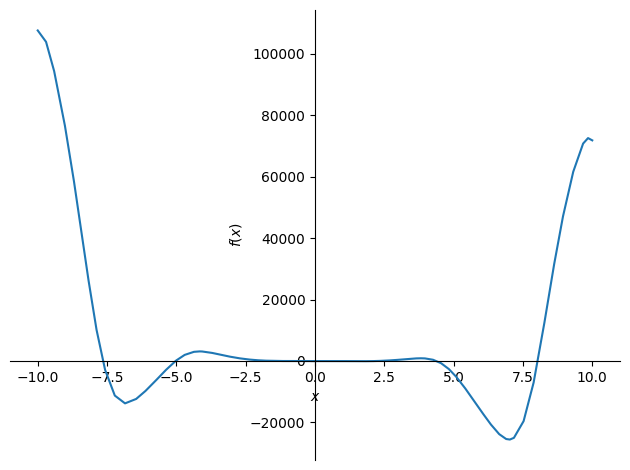

In [2]:
x = sympy.Symbol('x')
function = -12*x**4*sympy.sin(sympy.cos(x)) - 18*x**3+5*x**2 + 10*x - 30
sympy.plot(function, show=False).show()

# Нули функций

In [3]:
func_np = sympy.lambdify(x, '-12*x**4*sin(cos(x)) - 18*x**3+5*x**2 + 10*x - 30', modules=['numpy'])
solution = scipy.optimize.fsolve(func_np, -5)
zeros = []
zeros.append(solution[0])
solution = scipy.optimize.fsolve(func_np, 5)
zeros.append(solution[0])
solution = scipy.optimize.fsolve(func_np, [-2.5,2.5])
zeros.append(solution[0])
solution = scipy.optimize.fsolve(func_np, -8)
zeros.append(solution[0])
solution = scipy.optimize.fsolve(func_np, 7.5)
zeros.append(solution[0])
zeros.sort()
for i in zeros:
    print(i)

-7.650622285132756
-5.026865928206214
-1.3389666392771225
4.38352369796896
8.035164133413524


# График производной

12*x**4*sin(x)*cos(cos(x)) - 48*x**3*sin(cos(x)) - 54*x**2 + 10*x + 10


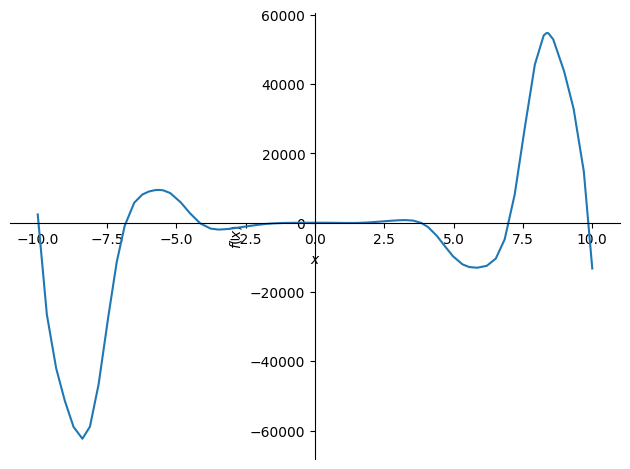

In [4]:
func_diff = sympy.diff(-12*x**4*sympy.sin(sympy.cos(x)) - 18*x**3+5*x**2 + 10*x - 30)
print(func_diff)
sympy.plot(func_diff,show=False).show()

# Вершины

In [5]:
find_extr = sympy.lambdify(x, '12*x**4*sin(x)*cos(cos(x)) - 48*x**3*sin(cos(x)) - 54*x**2 + 10*x + 10', modules=['numpy'])
extr = []
solution = scipy.optimize.fsolve(find_extr, -5)
extr.append(solution[0])
solution = scipy.optimize.fsolve(find_extr, 5)
extr.append(solution[0])
solution = scipy.optimize.fsolve(find_extr, 7.5)
extr.append(solution[0])
solution = scipy.optimize.fsolve(find_extr, 10)
extr.append(solution[0])
solution = scipy.optimize.fsolve(find_extr, -10)
extr.append(solution[0])
solution = scipy.optimize.fsolve(find_extr, -7.5)
extr.append(solution[0])
solution = scipy.optimize.fsolve(find_extr, -2.5)
extr.append(solution[0])
extr.sort()
for i in extr:
    print(i)

-9.9789537610151
-6.831370040000853
-4.167783523850484
-0.3926771799327562
3.8193108333822843
7.001031658541252
9.877149053972511


#  Промежутки возрастания

In [6]:
def up_down(function, roots):
    gaps = []
    for i in range(len(roots)-1):
        sol = function.evalf(subs={x:(roots[i+1] + roots[i])/2})
        if sol > 0:
            gaps.append(f'({roots[i]},{roots[i+1]}) - возрастание')
        elif sol < 0:
            gaps.append(f'({roots[i]},{roots[i+1]}) - убывание')
    if 'возрастание' in gaps[0]:
        gaps.insert(0,f'(-бесконечность, {roots[0]}) - убывание')
    else:
        gaps.insert(0,f'(-бесконечность, {roots[0]}) - возрастание')
    
    if 'возрастание' in gaps[len(gaps)-1]:
        gaps.append(f'({roots[len(roots)-1]}, +бесконечность ) - убывание')
    else:
        gaps.append(f'({roots[len(roots)-1]}, +бесконечность ) - возрастание')
    return gaps
mon_gaps = up_down(func_diff,extr)
for i in mon_gaps:
    print(i)

(-бесконечность, -9.9789537610151) - возрастание
(-9.9789537610151,-6.831370040000853) - убывание
(-6.831370040000853,-4.167783523850484) - возрастание
(-4.167783523850484,-0.3926771799327562) - убывание
(-0.3926771799327562,3.8193108333822843) - возрастание
(3.8193108333822843,7.001031658541252) - убывание
(7.001031658541252,9.877149053972511) - возрастание
(9.877149053972511, +бесконечность ) - убывание


# Промежутки больше и меньше нуля

In [8]:
def greater_less(function, roots):
    gaps = []
    for i in range(len(roots)-1):
        sol = function.evalf(subs={x:(roots[i+1] + roots[i])/2})
        if sol > 0:
            gaps.append(f'({roots[i]},{roots[i+1]}) - > 0')
        elif sol < 0:
            gaps.append(f'({roots[i]},{roots[i+1]}) - < 0')
    if '> 0' in gaps[0]:
        gaps.insert(0,f'(-бесконечность, {roots[0]}) - < 0')
    else:
        gaps.insert(0,f'(-бесконечность, {roots[0]}) - > 0')
    
    if '> 0' in gaps[len(gaps)-1]:
        gaps.append(f'({roots[len(roots)-1]}, +бесконечность ) - < 0')
    else:
        gaps.append(f'({roots[len(roots)-1]}, +бесконечность ) - > 0')
    return gaps
great_less_gaps = greater_less(function, zeros)
for i in great_less_gaps:
    print(i)

(-бесконечность, -7.650622285132756) - > 0
(-7.650622285132756,-5.026865928206214) - < 0
(-5.026865928206214,-1.3389666392771225) - > 0
(-1.3389666392771225,4.38352369796896) - < 0
(4.38352369796896,8.035164133413524) - < 0
(8.035164133413524, +бесконечность ) - > 0


In [9]:
import os
os.getcwd()

'd:\\Обучение\\Гигбрейнс\\1 четверть 2 блок\\Python\\Домашка\\DZ11py'